<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5151 - acc: 0.7777 - val_loss: 0.3794 - val_acc: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3018 - acc: 0.9041 - val_loss: 0.3340 - val_acc: 0.8687
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2219 - acc: 0.9281 - val_loss: 0.2941 - val_acc: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1738 - acc: 0.9445 - val_loss: 0.2797 - val_acc: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1409 - acc: 0.9547 - val_loss: 0.2830 - val_acc: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1186 - acc: 0.9629 - val_loss: 0.2944 - val_acc: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0991 - acc: 0.9710 - val_loss: 0.3125 - val_acc: 0.8813
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0811 - a

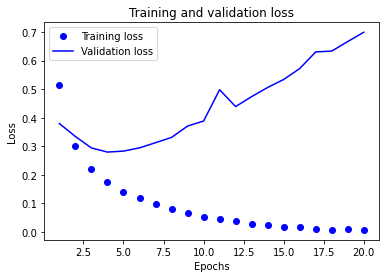

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Подготовка данных
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results=np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Создание проверочного набора
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

# Обучение модели
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict=history.history

# График потерь
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6063 - acc: 0.7105 - val_loss: 0.5456 - val_acc: 0.8150
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4845 - acc: 0.8573 - val_loss: 0.4681 - val_acc: 0.8235
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3987 - acc: 0.8961 - val_loss: 0.4029 - val_acc: 0.8638
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3320 - acc: 0.9148 - val_loss: 0.3522 - val_acc: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2806 - acc: 0.9261 - val_loss: 0.3247 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2412 - acc: 0.9356 - val_loss: 0.2989 - val_acc: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2108 - acc: 0.9423 - val_loss: 0.2859 - val_acc: 0.8918
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1863 - a

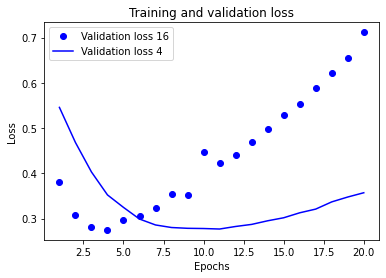

In [4]:
# Заменить её сетью с меньшей ёмкостью
model_smoll=models.Sequential()
model_smoll.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model_smoll.add(layers.Dense(4, activation='relu'))
model_smoll.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_smoll.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_smoll=model_smoll.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict_smoll=history_smoll.history

# График потерь
import matplotlib.pyplot as plt
val_loss_values_smoll = history_dict_smoll['val_loss']
acc_smoll=history_dict_smoll['acc']
epochs_smoll = range(1, len(acc_smoll) + 1)
plt.plot(epochs, val_loss_values, 'bo', label='Validation loss 16')
plt.plot(epochs_smoll, val_loss_values_smoll, 'b', label='Validation loss 4') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5498 - acc: 0.7441 - val_loss: 0.3180 - val_acc: 0.8753
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2569 - acc: 0.8976 - val_loss: 0.2743 - val_acc: 0.8896
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1677 - acc: 0.9345 - val_loss: 0.2707 - val_acc: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0779 - acc: 0.9747 - val_loss: 0.5040 - val_acc: 0.8572
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1165 - acc: 0.9777 - val_loss: 0.3353 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0043 - acc: 0.9995 - val_loss: 0.4862 - val_acc: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 5.3806e-04 - acc: 1.0000 - val_loss: 0.5913 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 8.4192

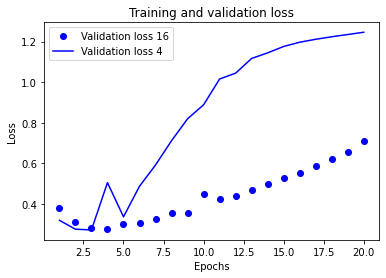

In [5]:
# Заменить её сетью с большей ёмкостью
model_big=models.Sequential()
model_big.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model_big.add(layers.Dense(512, activation='relu'))
model_big.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_big.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_big=model_big.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict_big=history_big.history

# График потерь
import matplotlib.pyplot as plt
val_loss_values_big = history_dict_big['val_loss']
acc_big=history_dict_big['acc']
epochs_big = range(1, len(acc_big) + 1)
plt.plot(epochs, val_loss_values, 'bo', label='Validation loss 16')
plt.plot(epochs_big, val_loss_values_big, 'b', label='Validation loss 512') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

Epoch 1/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4796 - acc: 0.8135
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2677 - acc: 0.9092
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2052 - acc: 0.9279
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1722 - acc: 0.9396
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1482 - acc: 0.9480
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1297 - acc: 0.9552
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1173 - acc: 0.9598
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1052 - acc: 0.9646
Epoch 9/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0919 - acc: 0.9694
Epoch 10/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0850 - acc: 0.9722
Epoch 11/20
49/49 [==============================] - 1s 13m

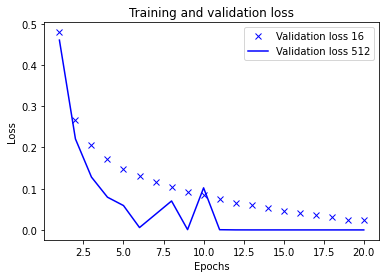

In [1]:
# На тренировочных данных
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Подготовка данных
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results=np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results
x_train=vectorize_sequences(train_data)

y_train=np.asarray(train_labels).astype('float32')

from keras import models
from keras import layers

model_train=models.Sequential()
model_train.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_train.add(layers.Dense(16, activation='relu'))
model_train.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_train.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history_train=model_train.fit(x_train, y_train, epochs=20, batch_size=512)
history_dict_train=history_train.history

loss_values_train = history_dict_train['loss']
acc_train=history_dict_train['acc']
epochs_train = range(1, len(acc_train) + 1)
#
model_big=models.Sequential()
model_big.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model_big.add(layers.Dense(512, activation='relu'))
model_big.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_big.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history_big_train=model_big.fit(x_train, y_train, epochs=20, batch_size=512)
history_dict_big_train=history_big_train.history

loss_values_big_train = history_dict_big_train['loss']
acc_big_train=history_dict_big_train['acc']
epochs_big_train = range(1, len(acc_big_train) + 1)

# График потерь
import matplotlib.pyplot as plt

plt.plot(epochs_train, loss_values_train, 'bx', label='Validation loss 16') 
plt.plot(epochs_big_train, loss_values_big_train, 'b', label='Validation loss 512') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5458 - acc: 0.7858 - val_loss: 0.4278 - val_acc: 0.8616
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3499 - acc: 0.9033 - val_loss: 0.3753 - val_acc: 0.8695
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2850 - acc: 0.9200 - val_loss: 0.3411 - val_acc: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2499 - acc: 0.9313 - val_loss: 0.3328 - val_acc: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2263 - acc: 0.9429 - val_loss: 0.3376 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2083 - acc: 0.9507 - val_loss: 0.3327 - val_acc: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2024 - acc: 0.9507 - val_loss: 0.3534 - val_acc: 0.8798
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1925 - a

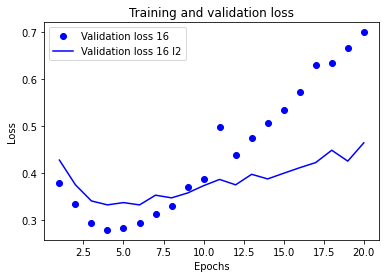

In [2]:
# Регуляризация l2
from keras import regularizers

# Заменить её сетью с большей ёмкостью
model_l2_reg=models.Sequential()
model_l2_reg.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_l2_reg.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_l2_reg.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_l2_reg.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_l2_reg=model_l2_reg.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict_l2_reg=history_l2_reg.history

# График потерь
import matplotlib.pyplot as plt
val_loss_values_l2_reg = history_dict_l2_reg['val_loss']
acc_l2_reg=history_dict_l2_reg['acc']
epochs_l2_reg = range(1, len(acc_l2_reg) + 1)
plt.plot(epochs, val_loss_values, 'bo', label='Validation loss 16')
plt.plot(epochs_l2_reg, val_loss_values_l2_reg, 'b', label='Validation loss 16 l2') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 1.0730 - acc: 0.7495 - val_loss: 0.7426 - val_acc: 0.7756
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6606 - acc: 0.8443 - val_loss: 0.6385 - val_acc: 0.8524
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6144 - acc: 0.8541 - val_loss: 0.6352 - val_acc: 0.8282
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5882 - acc: 0.8598 - val_loss: 0.5971 - val_acc: 0.8537
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5727 - acc: 0.8623 - val_loss: 0.5876 - val_acc: 0.8579
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5651 - acc: 0.8630 - val_loss: 0.6040 - val_acc: 0.8424
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5530 - acc: 0.8687 - val_loss: 0.6221 - val_acc: 0.8268
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5461 - a

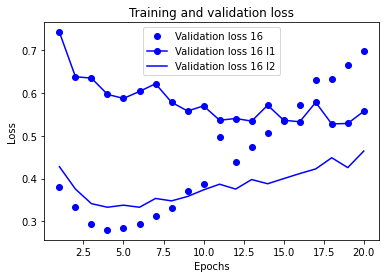

In [4]:
# Регуляризация l1
from keras import regularizers

# Заменить её сетью с большей ёмкостью
model_l1_reg=models.Sequential()
model_l1_reg.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model_l1_reg.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation='relu'))
model_l1_reg.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_l1_reg.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_l1_reg=model_l1_reg.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict_l1_reg=history_l1_reg.history

# График потерь
import matplotlib.pyplot as plt
val_loss_values_l1_reg = history_dict_l1_reg['val_loss']
acc_l1_reg=history_dict_l1_reg['acc']
epochs_l1_reg = range(1, len(acc_l1_reg) + 1)
plt.plot(epochs, val_loss_values, 'bo', label='Validation loss 16')
plt.plot(epochs_l1_reg, val_loss_values_l1_reg, 'bo-', label='Validation loss 16 l1') 
plt.plot(epochs_l2_reg, val_loss_values_l2_reg, 'b', label='Validation loss 16 l2') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 1.1068 - acc: 0.7200 - val_loss: 0.7443 - val_acc: 0.8320
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.7049 - acc: 0.8321 - val_loss: 0.6793 - val_acc: 0.8463
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6483 - acc: 0.8475 - val_loss: 0.6360 - val_acc: 0.8526
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6183 - acc: 0.8523 - val_loss: 0.6203 - val_acc: 0.8507
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5930 - acc: 0.8600 - val_loss: 0.6300 - val_acc: 0.8319
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5817 - acc: 0.8627 - val_loss: 0.6048 - val_acc: 0.8451
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5658 - acc: 0.8636 - val_loss: 0.5723 - val_acc: 0.8638
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5562 - a

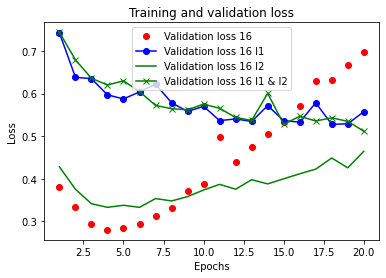

In [6]:
# Регуляризация l1 и l2
from keras import regularizers

# Заменить её сетью с большей ёмкостью
model_l1_l2_reg=models.Sequential()
model_l1_l2_reg.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
model_l1_l2_reg.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model_l1_l2_reg.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_l1_l2_reg.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_l1_l2_reg=model_l1_l2_reg.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict_l1_l2_reg=history_l1_l2_reg.history

# График потерь
import matplotlib.pyplot as plt

val_loss_values_l1_l2_reg = history_dict_l1_l2_reg['val_loss']
acc_l1_l2_reg=history_dict_l1_l2_reg['acc']
epochs_l1_l2_reg = range(1, len(acc_l1_l2_reg) + 1)
plt.plot(epochs, val_loss_values, 'ro', label='Validation loss 16')
plt.plot(epochs_l1_reg, val_loss_values_l1_reg, 'bo-', label='Validation loss 16 l1') 
plt.plot(epochs_l2_reg, val_loss_values_l2_reg, 'g', label='Validation loss 16 l2') 
plt.plot(epochs_l1_l2_reg, val_loss_values_l1_l2_reg, 'gx-', label='Validation loss 16 l1 & l2') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6556 - acc: 0.6126 - val_loss: 0.5528 - val_acc: 0.8300
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5537 - acc: 0.7314 - val_loss: 0.4519 - val_acc: 0.8687
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4748 - acc: 0.7907 - val_loss: 0.3747 - val_acc: 0.8754
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4022 - acc: 0.8370 - val_loss: 0.3250 - val_acc: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3520 - acc: 0.8672 - val_loss: 0.2961 - val_acc: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3044 - acc: 0.8881 - val_loss: 0.2855 - val_acc: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2697 - acc: 0.9034 - val_loss: 0.2752 - val_acc: 0.8915
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2377 - a

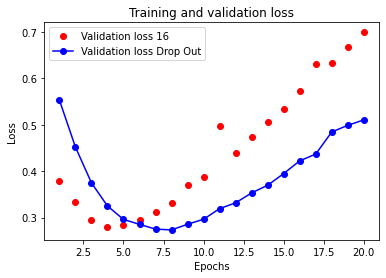

In [8]:
# С прореживанием
from keras import regularizers

# Заменить её сетью с большей ёмкостью
model_dropOut=models.Sequential()
model_dropOut.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropOut.add(layers.Dropout(0.5))
model_dropOut.add(layers.Dense(16, activation='relu'))
model_dropOut.add(layers.Dropout(0.5))
model_dropOut.add(layers.Dense(1, activation='sigmoid'))

# Обучение модели
model_dropOut.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_dropOut=model_dropOut.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

history_dict_dropOut=history_dropOut.history

# График потерь
import matplotlib.pyplot as plt

val_loss_values_dropOut = history_dict_dropOut['val_loss']
acc_dropOut=history_dict_dropOut['acc']
epochs_dropOut = range(1, len(acc_dropOut) + 1)
plt.plot(epochs, val_loss_values, 'ro', label='Validation loss 16')
plt.plot(epochs_dropOut, val_loss_values_dropOut, 'bo-', label='Validation loss Drop Out') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()